In [1]:
import pandas as pd
import numpy as np
import keras
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [2]:
train = pd.read_csv('./Data/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv("./Data/test.csv")

In [4]:
type(train)

pandas.core.frame.DataFrame

In [5]:
# Getting Training Data
y = train["label"]
g = sns.countplot(y)
x_train = train.drop(labels = ["label"], axis = 1)

In [6]:
# Checking for Null Values
x_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [7]:
# Normalisation
x_train = x_train/255.0
test = test/255.0

In [8]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
x_train = x_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

In [9]:
# Label Encoding
y = to_categorical(y, num_classes = 10)


In [10]:
# Split Train and Validation for Fitting
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y, test_size=0.1,random_state=2)

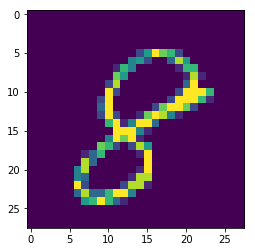

In [12]:
g = plt.imshow(X_train[0][:,:,0])
plt.show()

In [13]:
# Building an CNN Model
model = Sequential()

In [14]:
model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'Same', activation = 'relu', input_shape = (28, 28, 1)))

In [15]:
model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'Same', activation = 'relu'))

In [16]:
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

In [17]:
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'Same', activation = 'relu'))

In [19]:
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [22]:
# Define the optimizer
optimizer = RMSprop(lr = 0.001, epsilon = 1e-08, rho = 0.9, decay=0.0)

In [23]:
#Compile the model
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [25]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc', verbose = 1, patience = 3, factor = 0.5, min_lr = 0.00001)

In [26]:
epochs = 30
batch_size = 86

In [ ]:
# Data Augmentation
